In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from kneed import KneeLocator
import collections
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [2]:
data = pd.read_csv("./datasets/UniMiB-SHAR-2.csv")

subjects = data["Subject"]

data.drop("Subject", axis=1, inplace=True)

Y = data["Activity"]

data.drop("Activity", axis=1, inplace=True)

X = data[data.columns.to_list()]

X.head()

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,7.609005,7.322882,7.281458,7.753253,8.043099,8.215854,8.388745,8.578034,8.658356,8.670648,...,-6.372120,-6.323450,-6.474440,-6.449742,-6.415010,-6.514918,-6.590504,-6.535514,-6.453252,-6.182647
1,8.507709,8.480922,8.747757,8.863954,8.863968,8.458413,7.782317,7.412026,7.589061,7.709209,...,-6.785400,-6.583993,-6.291560,-6.472510,-6.626783,-6.774500,-6.929722,-6.846734,-6.704524,-6.513264
2,8.442040,8.632098,8.730012,8.697698,8.552650,8.057508,0.395888,-0.090756,-0.335575,-0.507582,...,-6.403487,-6.450791,-6.612762,-6.830472,-6.872514,-7.249798,-7.414935,-7.278581,-7.127102,-6.832014
3,-11.025566,-11.714652,-11.765208,-9.944634,-7.660169,-6.882160,-7.601299,-9.161294,-10.339050,-11.046978,...,-7.715563,-7.764263,-7.755619,-8.040819,-8.091955,-7.817943,-7.768974,-7.687118,-7.795514,-7.819323
4,0.238472,0.321549,0.383802,0.495767,0.664556,0.776264,1.019609,1.010645,0.850412,0.473916,...,-7.614920,-7.553618,-7.381002,-7.324491,-7.473060,-7.441543,-7.546224,-7.474858,-7.441730,-7.412475


In [4]:
x, X_test, y , y_test = train_test_split(X,Y,test_size=0.15,random_state=0)

In [6]:
max_depth = 50
n_repeats = 30
k_folds = 10

rf = np.zeros(max_depth)
rf_acc = np.zeros(max_depth)
rf_f1_micro = np.zeros(max_depth)
rf_f1_macro = np.zeros(max_depth)
rf_f1_weighted = np.zeros(max_depth)

count = 1
for i in range (1, max_depth + 1):
    rf[count-1] = i
    
    print("RF, max depth:",i)

    cv = RepeatedKFold(n_splits=k_folds, n_repeats=n_repeats, random_state=0)
    
    model = RandomForestClassifier(n_estimators=15, max_depth=i)
    
    scoring = ['accuracy', 'f1_micro', 'f1_macro', 'f1_weighted']
    
    scores = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1)
    
    rf_acc[count - 1] = scores['test_accuracy'].mean()
    
    count = count + 1

metrics_df = pd.DataFrame({
    'n_estimators': rf,
    'accuracy': rf_acc,
}) 

RF, max depth: 1
RF, max depth: 2
RF, max depth: 3
RF, max depth: 4
RF, max depth: 5
RF, max depth: 6
RF, max depth: 7
RF, max depth: 8
RF, max depth: 9
RF, max depth: 10
RF, max depth: 11
RF, max depth: 12
RF, max depth: 13
RF, max depth: 14
RF, max depth: 15
RF, max depth: 16
RF, max depth: 17
RF, max depth: 18
RF, max depth: 19
RF, max depth: 20
RF, max depth: 21
RF, max depth: 22
RF, max depth: 23
RF, max depth: 24
RF, max depth: 25
RF, max depth: 26
RF, max depth: 27
RF, max depth: 28
RF, max depth: 29
RF, max depth: 30
RF, max depth: 31
RF, max depth: 32
RF, max depth: 33
RF, max depth: 34
RF, max depth: 35
RF, max depth: 36
RF, max depth: 37
RF, max depth: 38
RF, max depth: 39
RF, max depth: 40
RF, max depth: 41
RF, max depth: 42
RF, max depth: 43
RF, max depth: 44
RF, max depth: 45
RF, max depth: 46
RF, max depth: 47
RF, max depth: 48
RF, max depth: 49
RF, max depth: 50


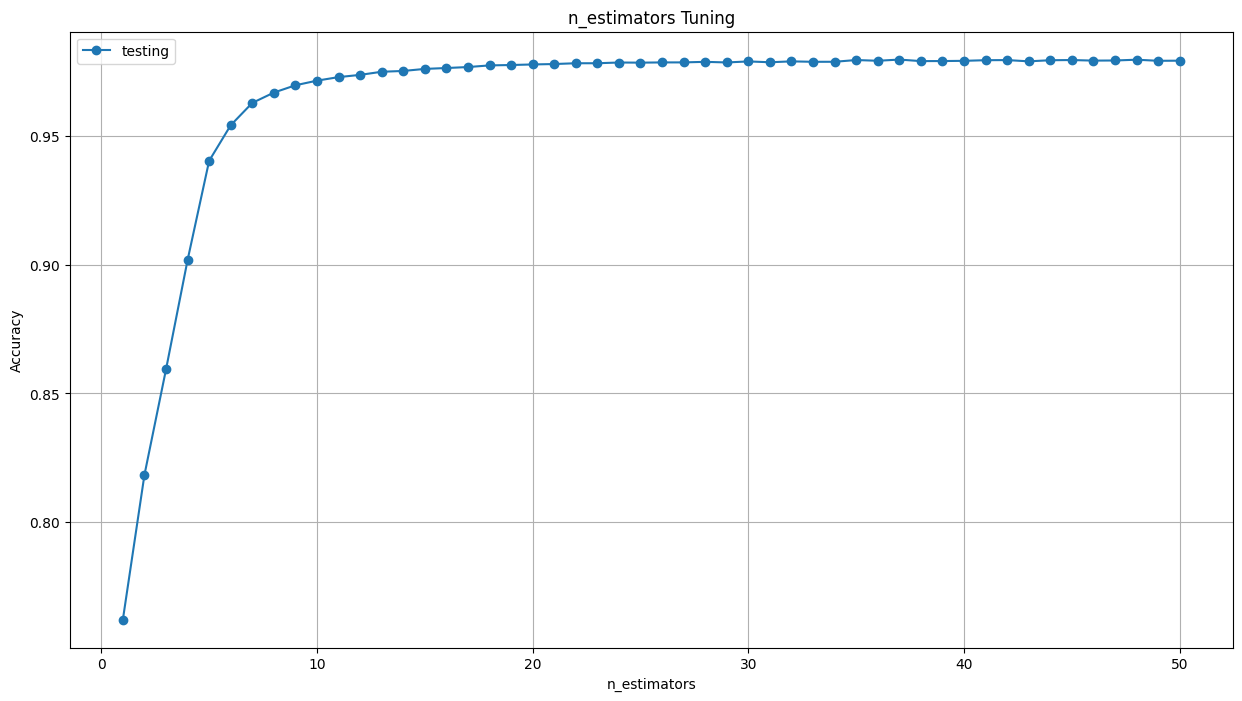

7.0


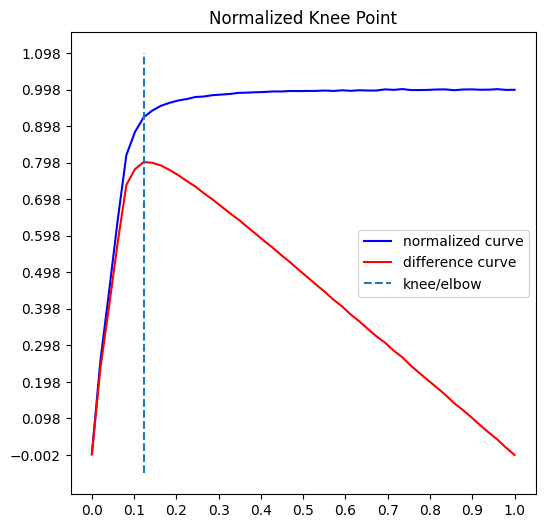

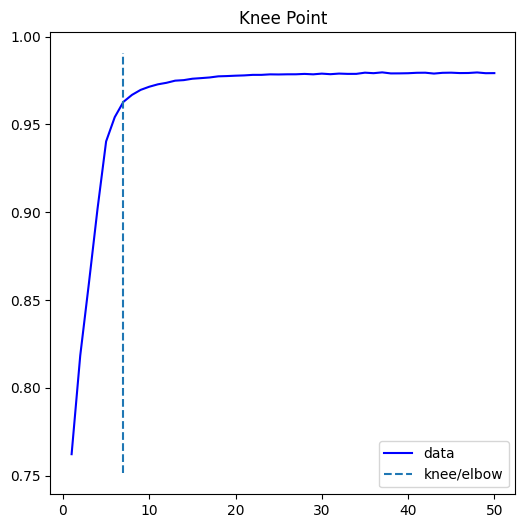

In [7]:

plt.figure(figsize=(15, 8))
plt.plot(rf, rf_acc, '-o', label="testing")
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.title("n_estimators Tuning")
plt.show()

kneedle = KneeLocator(rf, rf_acc.tolist(), S=1.0, curve="concave", direction="increasing")

print(round(kneedle.knee, 3))
kneedle.plot_knee_normalized()
kneedle.plot_knee()

In [11]:
model = RandomForestClassifier(n_estimators=15, max_depth=10)
model.fit(x, y)  

y_train_hat = model.predict(x)
y_test_hat = model.predict(X_test)

#print(metrics.accuracy_score(y_test,y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))
#print(metrics.f1_score(y_test, y_test_hat, average=None))
print(metrics.classification_report(y_test, y_test_hat))

[[ 339    0   27   21    8]
 [   0  525   80   96  115]
 [   0   17 1174   71   41]
 [   0   27  104  507  111]
 [   2   63  122  199 1280]]
              precision    recall  f1-score   support

   OPTY_A_01       0.99      0.86      0.92       395
   OPTY_A_02       0.83      0.64      0.73       816
   OPTY_A_03       0.78      0.90      0.84      1303
   OPTY_A_04       0.57      0.68      0.62       749
   OPTY_A_05       0.82      0.77      0.79      1666

    accuracy                           0.78      4929
   macro avg       0.80      0.77      0.78      4929
weighted avg       0.79      0.78      0.78      4929


In [12]:
feature_names = X.columns

feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df_sorted)

feature_importances_df_sorted.to_csv("D:/Estudios/Tesis/resultados/OPTYIMU_32_50/n_e_15/rf_importance_10.csv", index=False)

                      Feature  Importance
43     mean_MgFld_tChest_X(T)    0.059940
33    mean_Acctr_tRLA_X(m/s2)    0.043562
42     mean_MgFld_tChest_X(G)    0.035249
58   median_Acctr_tLA_Y(m/s2)    0.033153
31     mean_Acctr_tLA_Y(m/s2)    0.032509
..                        ...         ...
180     var_MgFld_tChest_Y(T)    0.000000
182     var_MgFld_tChest_Z(T)    0.000000
184       var_MgFld_tRLA_X(T)    0.000000
186       var_MgFld_tRLA_Y(T)    0.000000
188       var_MgFld_tRLA_Z(T)    0.000000

[189 rows x 2 columns]


In [13]:
acum_trans = collections.defaultdict(float)
acum_disp = collections.defaultdict(float)
acum_pos = collections.defaultdict(float)

for _, row in feature_importances_df.iterrows():
    feature = row["Feature"]
    importance = row["Importance"]
    trans, disp, pos = feature.split("_", 2)
    acum_trans[trans] += importance
    acum_disp[disp] += importance
    pos = pos.rsplit("_", 1)[0] 
    acum_pos[pos] += importance

lista_acum_trans = list(acum_trans.items())
lista_acum_disp = list(acum_disp.items())
lista_acum_pos = list(acum_pos.items())

df_acum_trans = pd.DataFrame(lista_acum_trans, columns=["Transformación", "Acumulado"])
df_acum_disp = pd.DataFrame(lista_acum_disp, columns=["Dispositivo", "Acumulado"])
df_acum_pos = pd.DataFrame(lista_acum_pos, columns=["Posición", "Acumulado"])

df_acum_trans.to_csv("D:/Estudios/Tesis/resultados/OPTYIMU_32_50/n_e_15/rf_acum_trans_10.csv", index=False)
df_acum_disp.to_csv("D:/Estudios/Tesis/resultados/OPTYIMU_32_50/n_e_15/rf_acum_disp_10.csv", index=False)
df_acum_pos.to_csv("D:/Estudios/Tesis/resultados/OPTYIMU_32_50/n_e_15/rf_acum_pos_10.csv", index=False)